# Gráficos interactivos <a class="tocSkip">

## Trabajo simple con imágenes

Vamos a empezar leyendo y mostrando algunas imágenes, para entender cómo es su representación.
Para leer y escribir imágenes vamos a usar el paquete adicional `imageio`. **Scipy** tiene funciones (con el mismo nombre) para realizar este trabajo en el submódulo `misc` pero está planeado que desaparezcan en un futuro no muy lejano.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

El siguiente ejemplo es una figura tomada de algunas pruebas que hicimos en el laboratorio hace unos años. Es el resultado de la medición de flujo en toberas

La imagen "imag1" es del tipo: <class 'numpy.ndarray'> con "shape" (272, 652, 3)


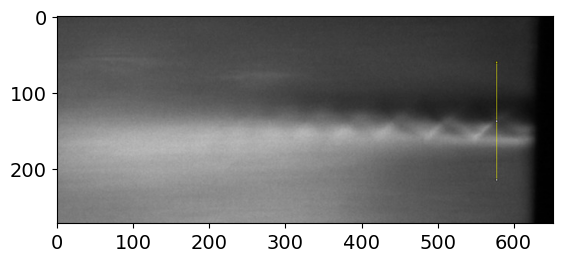

In [2]:
imag1 = plt.imread('figuras/imagen_flujo.jpg')
print(f'La imagen "imag1" es del tipo: {type(imag1)} con "shape" {imag1.shape}')
plt.imshow(imag1);

La representación de la imagen es una matriz, donde cada elemento corresponde a un pixel, y cada pixel tiene tres valores. El elemento `[0,0]` corresponde al pixel ubicado en la esquina superior izquierda, el elemento  `[-1,0]` al pixel ubicado en la esquina inferior izquierda, mientras que el  `[0,-1]` a la esquina superior derecha:

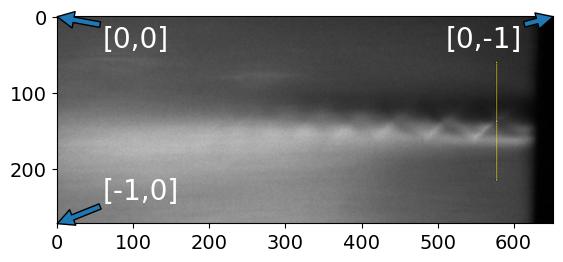

In [3]:
plt.imshow(imag1)
color='white'
plt.annotate("[0,0]",(0,0), (60,40), arrowprops={}, fontsize='x-large', color=color)
plt.annotate("[-1,0]",(0,272), (60,240), arrowprops={}, fontsize='x-large', color=color)
plt.annotate("[0,-1]",(652,0), (510,40), arrowprops={}, fontsize='x-large', color=color);

En consecuencia podemos ver qué valores toma cada pixel

In [4]:
print(imag1[0,0])             # El primer elemento
print(imag1[0,1])             # El segundo elemento
print(imag1.min(),imag1.max())  # y sus valores mínimo y máximo

[65 65 65]
[66 66 66]
0 255


Como vemos en cada pixel el valor está dado por un array de tres números enteros

In [5]:
imag1.dtype

dtype('uint8')

Como originalmente teníamos una figura en escala de grises, podemos convertir los tres colores a una simple escala, por ejemplo promediando los tres valores. La función `imread()` puede interpretar la figura como una escala de grises con los argumentos adecuados:

In [6]:
imag2 = plt.imread('figuras/imagen_flujo_gray.jpg')

La variable `imag2` contiene ahora una matriz con las dimensiones de la imagen (272 x 652) pero con sólo un valor por cada pixel

In [7]:
print(imag2.shape)
print(imag2[0,0])

(272, 652)
65


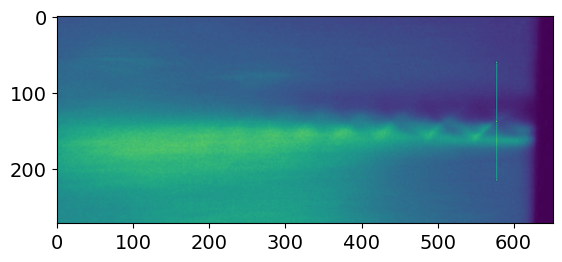

In [8]:
plt.imshow(imag2);

---

**Nota**
¿Qué pasó acá?

La función `imshow()` está interpretando el valor de cada pixel como una posición en una cierta escala de colores (**colormap**). Como no especificamos cuál queremos utilizar, se usó el cmap *default*. 

---


Especifiquemos el **colormap** a utilizar para la graficación:

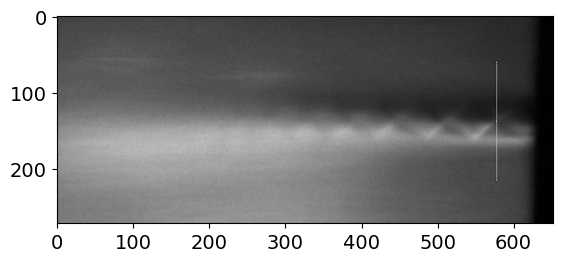

In [9]:
plt.imshow(imag2, cmap='gray');

Los `cmap` aparecen también en el contexto de graficación de gráficos de contorno (`contour()` y `contourf()`).

Al asociar un valor a un mapa de colores, la misma imagen puede mostrarse de diferente maneras. Veamos otros ejemplos de *colormap* 

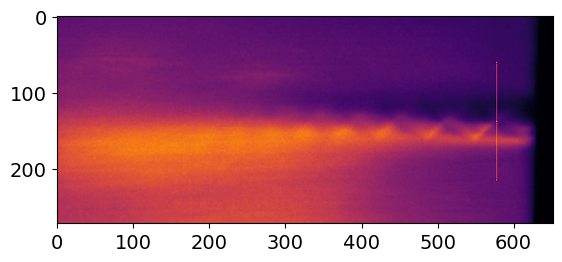

In [10]:
plt.imshow(imag2, cmap='inferno');

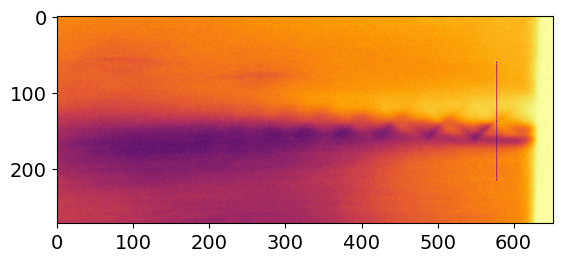

In [11]:
plt.imshow(imag2, cmap='inferno_r');

La referencia de ubicación de los `cmap` existentes está en:
http://matplotlib.org/examples/color/colormaps_reference.html

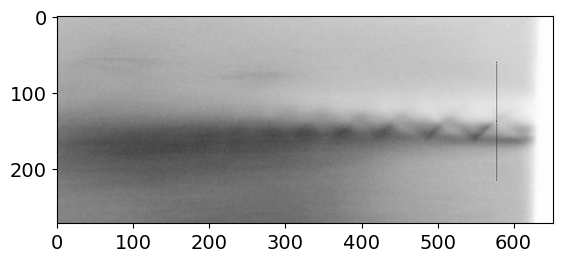

In [12]:
plt.imshow(imag2, cmap='gray_r');

### Análisis de la imagen

La imagen es una representación en mapa de colores de lo valores en la matriz. Esta es una representación que da muy buena información cualitativa sobre las características de los datos. Para analizar los datos a veces es más fácil hacer cortes o promediar en alguna dirección los datos.


#### Histograma de intensidades

Un ejemplo es el cálculo de un histograma de intensidades, analizando toda la imagen.

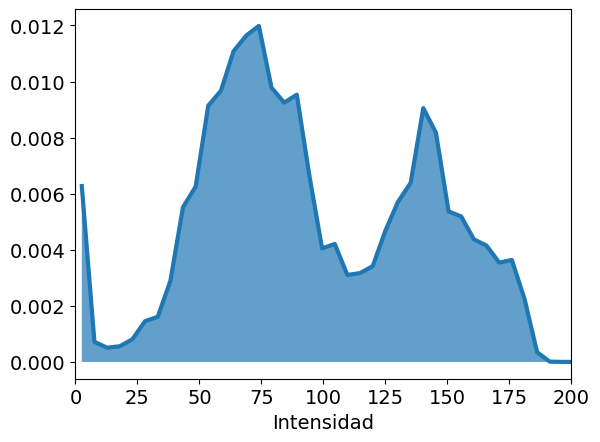

In [13]:
hist, bin_edges = np.histogram(imag2, bins=50, density=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
plt.fill_between(bin_centers, 0, hist, alpha=0.7)
plt.plot(bin_centers, hist, color='C0', lw=3)
plt.xlabel('Intensidad')
plt.xlim((0,200));

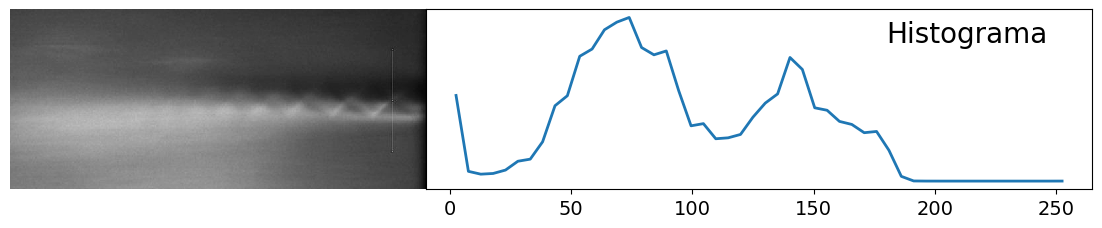

In [14]:
# Creamos una figura con los dos gráficos
fig, ax = plt.subplots(figsize=(10,2), ncols=2)
# En el gráfico de la izquierda mostramos la imagen en escala de grises
ax[0].imshow(imag2, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')   # Eliminamos los dos ejes
#
# Graficamos a la derecha el histograma
ax[1].plot(bin_centers, hist, lw=2)
ax[1].text(180, 0.85*hist.max(), 'Histograma', fontsize=20)
ax[1].set_yticks([])   # Sólo valores en el eje x
plt.subplots_adjust(wspace=-0.20, top=1, bottom=0.1, left=-0.2, right=1)

Estos histogramas, son útiles pero no dan información sobre las variaciones de intensidad con la posición. De alguna manera estamos integrando demasiado. Cuando vemos la imagen, vemos un mapa de intensidad en dos dimensiones. Al hacer el histograma sobre toda la figura perdemos completamente la información sobre la posición.

#### Cortes en una dirección

Un análisis intermedio podemos hacerlo haciendo cortes a lo largo de alguna línea y analizando la intensidad. Por ejemplo, podemos elegir una línea vertical en un punto $x_0$, y analizar como varía la intensidad a lo largo de esa línea:

In [15]:
x0 = int(imag2.shape[1]*7/9)      # Elegimos un punto en el eje x
print(f'posición en eje x={x0} de un total de {imag2.shape[1]}')

posición en eje x=507 de un total de 652


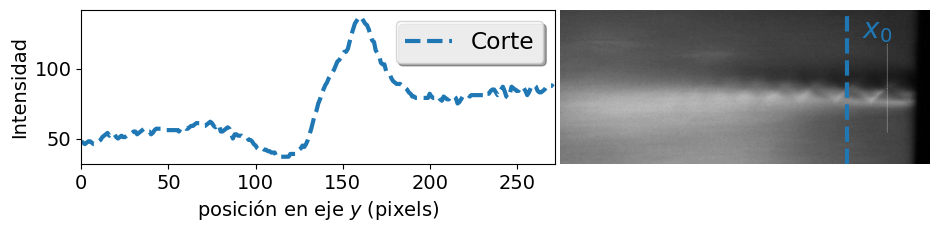

In [16]:
# Creamos la figura con dos subplots
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(10,2))
# graficamos la imagen en el subplot de la derecha
ax1.imshow(imag2, cmap=plt.cm.gray)
# y agregamos la línea vertical en el punto elegido
ax1.axvline(x0, ls='--', lw=3)
ax1.text(1.05*x0, 50, '$x_{0}$', fontsize='x-large', color='C0')
ax1.axis('off')
#
# Creamos linea como un array 1D con los datos a lo largo de la línea deseada
# y la graficamos
linea = imag2[:,x0]
ax2.plot(linea,'--', lw=3, label='Corte')
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
ax2.legend(loc='best')
ax2.set_xlim((0,len(linea)))
# Ajustamos el margen izquierdo y la distancia entre los dos subplots  
plt.subplots_adjust(wspace=-0.1, left=0)

-----

## Ejercicios 14 (a)

1. Modificar el ejemplo anterior para presentar en una figura tres gráficos, agregando a la izquierda un panel donde se muestre un corte horizontal. El corte debe estar en la mitad del gráfico ($y_{0}=136$). En la figura debe mostrar la posición del corte (similarmente a como se hizo con el corte en $x$) con una línea de otro color.

-----

## Gráficos interactivos ("widgets")
Veamos cómo se puede hacer este tipo de trabajo en forma interactiva. Para ello **Matplotlib** tiene un submódulo `widgets` con rutinas que están diseñadas para funcionar con cualquier *backend* interactivo. (más información en: http://matplotlib.org/api/widgets_api.html)

### Cursor

Empecemos estudiando como agregar un indicador de la posición del cursor a un gráfico.

```python

# Archivo: ejemplo_cursor.py

from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

x, y = 4 * (np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Usamos: useblit = True en el backed gtkagg
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()
```

En este caso, el programa está escrito separadamente y lo podemos ejecutar desde la notebook (como en este caso) o desde una terminal independientemente.
Para ejecutar un script en forma interactiva desde la *notebook* de *Jupyter* debemos setear el *backend* a una opción interactiva (que no es el valor por default en las notebooks). En este caso vamos a usar el backend *tk* 

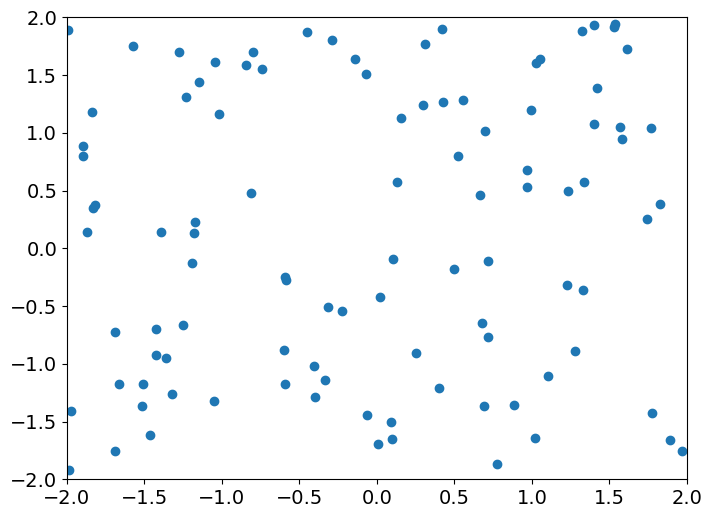

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

x, y = 4 * (np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2);

In [18]:
%matplotlib tk
import matplotlib.pyplot as plt
%run scripts/ejemplo_cursor.py

En este ejemplo simple conocemos casi todas las líneas (creamos la figura y graficamos). Las líneas novedosas y relevantes son

1. La primera línea importando la función `Cursor()` para describir el *cursor* o *mouse*:
```python
from matplotlib.widgets import Cursor
```
2. La línea en que usamos la función `Cursor`
  ```python
  cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
  ```
  que crea el objeto `Cursor`. La forma de esta función es:
  
  ```python
  Cursor(ax, horizOn=True, vertOn=True, useblit=False, **lineprops)
  ```
  y toma como argumento el eje en el cuál agregamos el cursor. Como argumentos opcionales se puede controlar la visibilidad de la línea horizontal (`horizOn`) y vertical (`vertOn`) que pueden tomar valores lógicos `True` o `False`. Además tiene argumentos *keyword* para controlar la apariencia de las líneas. En este ejemplo pusimos explícitamente que queremos una línea roja con un grosor igual a `2`.

### Manejo de eventos

Para que la interactividad sea útil es importante obtener datos de nuestra interacción con el gráfico. Esto se obtiene con lo que se llama "manejo de eventos" ("Event handling").

Para recibir *events* necesitamos **escribir y conectar** una función que se activa cuando ocurre el evento (*callback*). Veamos un ejemplo simple pero importante, donde imprimimos las coordenadas donde se presiona el *mouse*.

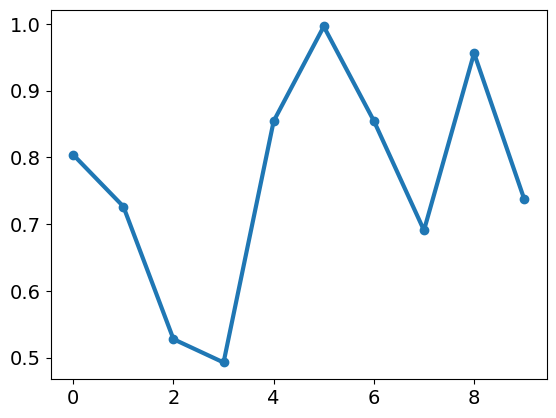

<Figure size 640x480 with 0 Axes>

In [19]:
# Mostramos la figura (sin interactividad)
%matplotlib inline
%run scripts/ejemplo_callback.py

```python 
# Archivo: ejemplo_callback.py
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.random.rand(10), 'o-', lw=3)

def onclick(event):
  print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
        (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
```

![](figuras/uso_callbacks1.png)

En este ejemplo utilizamos el método `mpl_connect` del objeto `canvas`.

- El objeto `canvas` es el área donde se dibuja la figura. 
- La función `mpl_connect` realiza la conección de la función (que aquí llamamos `onclick`) con la figura.
  Esta función toma como argumento el *event* (que, para nosotros, es interpretado automaticamente por Matplotlib)

- El objeto `event` es de tipo `button_press_event`. Se dispara cuando apretamos un botón del *mouse* y *matplotlib* le pasa como argumento un objeto del tipo `event` que contiene información. Nosotros estamos imprimiendo la siguiente información que contiene `event` por pantalla:
  - `event.button`: indica que botón se presionó
  - `event.x`, `event.y`: dan la información sobre el índice en los ejes horizontal y vertical
  - `event.xdata, event.ydata`: dan los valores de los datos en los ejes.


Puede leer más información sobre el manejo de eventos en http://matplotlib.org/users/event_handling.html.

### Ejemplos integrados

Continuando con esta idea vamos a usar la capacidad de poder interactuar con el gráfico para elegir una zona del gráfico de la cuál obtenemos información sobre los datos.

```python
# Archivo: scripts/analizar_figura_1.py

import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor

img = plt.imread('../figuras/imagen_flujo_gray.jpg')
ymax = img.max()

def seleccionar(event):
  """Secuencia:
  1. Encuentro el punto donde el mouse hizo 'click'
  2. Le doy valores a la línea vertical
  3. Le doy valores a la curva en el grafico de la derecha
  4. y 5. Grafico los nuevos valores
  """
  x0 = event.xdata
  n0 = int(x0)
  l1.set_data([[n0, n0], [0., 1.]])
  l2.set_data(range(img.shape[0]), img[:, n0])
  l1.figure.canvas.draw()
  l2.figure.canvas.draw()


# Defino la figura
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

# Mostramos la imagen como un mapa de grises
ax1.imshow(img, cmap='gray', interpolation='nearest')
ax1.axis('off')

# Agrego la línea inicial en un valor inicial
x0 = 100
l1 = ax1.axvline(x0, color='r', ls='--', lw=3)

# Grafico de la derecha
l2, = ax2.plot(img[:, x0], 'r-', lw=2, label='corte')
ax2.set_ylim((0, ymax))
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
ax2.legend(loc='best')

fig.tight_layout()

# Agrego el cursor y conecto la accion de presionar a la funcion click
cursor = Cursor(ax1, horizOn=False, vertOn=True, useblit=True,
                color='blue', linewidth=1)
fig.canvas.mpl_connect('button_press_event', seleccionar)

plt.show()

```


In [20]:
%matplotlib tk
%run scripts/analizar_figura_1.py

Este es un ejemplo un poco más largo (y un poquito más complejo).

1. Importamos los módulos y funciones necesarias.
  - `matplotlib.pyplot as plt` para casi todo
  - `imageio` para leer la figura
  - `from matplotlib.widgets import Cursor` para importar el objeto `Cursor` que nos muestra la posición del mouse.
2. Leemos la imagen de archivo, creamos la figura y la mostramos.
3. Elegimos un valor de $x$ inicial (igual a 100) y agregamos una línea vertical en ese punto.
4. Creamos la figura de la derecha con los datos tomados de la columna correspondiente de la matriz que representa la imagen.
6. Agregamos *labels* y ajustamos las distancias
5. Mostramos el cursor y le conectamos el evento (standard) `button_press_event` a nuestra función `seleccionar()`.
6. La función `seleccionar()` toma como argumento el evento que se dispara por interacción con el usuario.  
El argumento `event` lo pasa automáticamente *Matplotlib*. En este caso es un *click* del mouse en una zona del gráfico.

La función `seleccionar(event)`:
1. Del argumento `event` extrae la posición en el eje horizontal y lo asigna a la variable `x0`.
2. El índice en el eje horizontal (`n0`).
2. Actualiza los datos de la línea `l1` con valores para la línea vertical en el panel izquierdo.
4. Actualiza la línea `l2` en la figura de la derecha con el corte en `x0`.
5. Actualiza el dibujo de las líneas sobre el *canvas*.

El siguiente ejemplo es muy similar al anterior. Sólo estamos actualizando la leyenda, para tener información del punto seleccionado.

In [21]:
%run scripts/analizar_figura_2.py

```python
# Archivo:analizar_figura_2.py
import matplotlib.pyplot as plt
from scipy import misc
from matplotlib.widgets import Cursor

img = plt.imread('../figuras/imagen_flujo_gray.jpg')
ymax = img.max()


def click(event):
  """Secuencia:
  1. Encuentro el punto donde el mouse hizo 'click'
  2. Le doy valores a la línea vertical
  3. Le doy valores a la curva en el grafico de la derecha
  4. y 5. Grafico los nuevos valores
  """
  x0 = event.xdata
  n0 = int(x0)
  l1.set_data([[n0, n0], [0., 1.]])
  l2.set_data(range(img.shape[0]), img[:, n0])
  leg2.texts[0].set_text('corte en {:.1f}'.format(x0))
  l1.figure.canvas.draw()
  l2.figure.canvas.draw()


# Defino la figura
# Defino la figura
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

ax1.imshow(img, cmap="gray", interpolation='nearest')
ax1.axis('off')
# Agrego la línea inicial en un valor inicial
x0 = 100
l1 = ax1.axvline(x0, color='r', ls='--', lw=3)

# Grafico de la derecha
l2, = ax2.plot(img[:, x0], 'r-', lw=2, label='corte en {:.1f}'.format(x0))
ax2.set_ylim((0, ymax))
ax2.set_xlabel(u'posición en eje $y$ (pixels)')
ax2.set_ylabel('Intensidad')
leg2 = ax2.legend(loc='best')

fig.tight_layout()

# Agrego el cursor y conecto la accion de presionar a la funcion click
cursor = Cursor(ax1, horizOn=False, vertOn=True, useblit=True,
                color='blue', linewidth=1)
fig.canvas.mpl_connect('button_press_event', click)

plt.show()
```

Las diferencias más notables con el ejemplo anterior son:

1. Al crear la leyenda, asignamos el objeto creado a la variable `leg2`, en la línea:
  ```python
  leg2 = ax2.legend(loc='best')
  ```
2. En la función `click(event)` (equivalente a `seleccionar(evento)` en el ejemplo anterior) actualizamos el texto de la leyenda con el valor de `x0`:
  ```python
  leg2.texts[0].set_text('corte en {:.1f}'.format(x0))
  ```

-----

## Ejercicios 14 (b)

2. Modificar el ejemplo anterior (**analizar_figura_2.py**) para presentar tres gráficos, agregando a la izquierda un panel donde se muestre el corte horizontal de la misma manera que en el ejercicio anterior. Al seleccionar con el *mouse* debe mostrar los dos cortes (horizontal y vertical).

-----